# GDP analysis for Tunisia

In [1]:
import os
import pandas as pd
os.chdir('..')
print(os.getcwd())
from src.regressions import *
from src.helpers import *
from src.statistical_analysis import *
from src.evaluation_metrics import *
from src.feature_engineering import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 


/home/nizar/Desktop/econometrics/GDP


In [2]:
PATH = os.path.join("data", "Tunisia2.csv")
dataset = pd.read_csv(PATH)

In [3]:
dataset

,YEAR,CGPD RELATIVE TO THE UNITED STATES (unit US=100),CONSUMPTION SHARE OF CGPD (unit %),CONSUMPTION SHARE OF RGDPL (unit %),CURRENT SAVINGS (unit %),EXCHANGE RATE (unit US=1),GOVERNMENT SHARE OF CGDP (unit %),GOVERNMENT SHARE OF RGDPL (unit %),INVESTMENT SHARE OF CGDP (unit %),INVESTMENT SHARE OF RGDPL (unit %),OPENNESS IN CONSTANT PRICES (unit %),OPENNESS IN CURRENT PRICES (unit %),POPULATION (unit 000S),PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE),PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE),PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100),PRICE LEVEL OF INVESTMENT (unit PPP/XRATE),RATIO OF GNP TO GDP (CURRENT PRICES) (unit %),REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


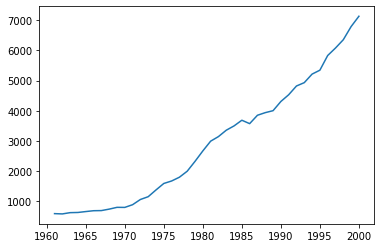

In [4]:
plt.plot(dataset["YEAR"], dataset["REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)"])

Index(['YEAR', 'CGPD RELATIVE TO THE UNITED STATES (unit US=100)',
       'CONSUMPTION SHARE OF CGPD (unit %)',
       'CONSUMPTION SHARE OF RGDPL (unit %)', 'CURRENT SAVINGS (unit %)',
       'EXCHANGE RATE (unit US=1)', 'GOVERNMENT SHARE OF CGDP (unit %)',
       'GOVERNMENT SHARE OF RGDPL (unit %)',
       'INVESTMENT SHARE OF CGDP (unit %)',
       'INVESTMENT SHARE OF RGDPL (unit %)',
       'OPENNESS IN CONSTANT PRICES (unit %)',
       'OPENNESS IN CURRENT PRICES (unit %)', 'POPULATION (unit 000S)',
       'PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE)',
       'PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE)',
       'PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100)',
       'PRICE LEVEL OF INVESTMENT (unit PPP/XRATE)',
       'RATIO OF GNP TO GDP (CURRENT PRICES) (unit %)',
       'REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)'],
      dtype='object')
(40, 18)


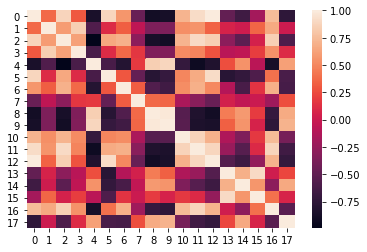

In [5]:
X, y = X_y_from_dataset(dataset)
print(dataset.columns)
print(X.shape)
#X = add_bias(X)
#X = z_score_scaling(X)
correlation_matrix = np.corrcoef(X, rowvar=False)
import seaborn as sns 
sns.heatmap(correlation_matrix)
#dataset.iloc[:,:-1].columns[np.sum(correlation_matrix > 0.98, axis=1) > 1]
#X = z_score_scaling(X)


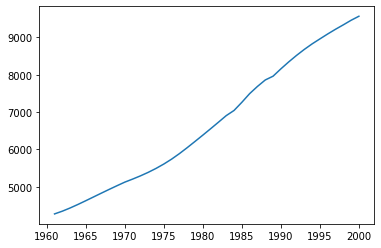

In [6]:
plt.plot(dataset["YEAR"], dataset["POPULATION (unit 000S)"])

In [7]:
#The problem is that the slope changes after 89 which is our training set 
# thus we done take away this varaible because it lowers the performance.

In [8]:
X_train, X_test, y_train, y_test = split(X, y)
w = least_squares(X_train, y_train)

In [9]:
r_2 = r2_score(y, predict(X,w))
r_2

0.9800708465850282

In [10]:
adj_r_2 = adjusted_R_squared(y, predict(X, w), X_test.shape[1])
adj_r_2

0.9629887150864809

In [11]:
var = variance_least_squares_weights(y, predict(X, w), X)
var.shape

(18, 1)

In [12]:
lower_CI, upper_CI = confidence_interval(X.shape, w, var)
w-lower_CI 

array([[1.10466645e+01],
       [7.53412201e+00],
       [2.16245295e+02],
       [8.37963090e+00],
       [2.17559202e+02],
       [1.49356889e+02],
       [2.29606085e+02],
       [2.23745967e+01],
       [2.55433442e+01],
       [2.29312701e+01],
       [1.74563184e+00],
       [1.51098462e+00],
       [7.55157707e-02],
       [1.33270340e+01],
       [2.73939612e+00],
       [1.76944707e+01],
       [3.45769892e+00],
       [1.05625981e+01]])

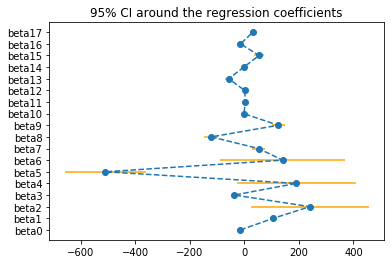

In [13]:
#plt.gca().fill_between(np.arange(X.shape[1]), np.squeeze(lower_CI), np.squeeze(upper_CI), label="95% CI", color="#b9cfe7", edgecolor="")
#plt.plot(np.arange(X.shape[1]), w, label="w")
plt.errorbar(w, np.arange(X.shape[1]), xerr=np.vstack([np.squeeze(w-lower_CI), np.squeeze(upper_CI-w)]), fmt="--o", ecolor='orange')
plt.yticks(np.arange(X.shape[1]), ["beta"+str(i) for i in np.arange(X.shape[1])])
#plt.legend()
plt.title("95% CI around the regression coefficients")
plt.show()

In [14]:
var_ = variance_least_squares_line(y, predict(X, w), X)
var_.shape

(40, 1)

In [23]:
lower_CI_line, upper_CI_line = confidence_interval(X.shape, X@w, var_)
#lower_CI_line - X@w

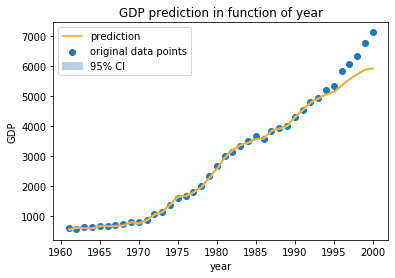

In [29]:
plt.scatter(X[:, 0], y, label="original data points")
plt.plot(X[:, 0], predict(X, w), color="orange", label="prediction")
#plt.plot(X[:, 0], lower_CI_line, '--', X[:, 0], upper_CIline, '--', color="orange", label="95% confidence intervals")
plt.gca().fill_between(X[:, 0], np.squeeze(lower_CI_line), np.squeeze(upper_CI_line), label="95% CI", color="#b9cfe7", edgecolor="")
#plt.errorbar(X[:, 0], X@w, yerr=np.vstack([np.squeeze(X@w-lower_CI_line), np.squeeze(upper_CI_line-X@w)]), fmt="--o", ecolor='orange')
plt.xlabel("year")
plt.ylabel("GDP")
plt.title("GDP prediction in function of year")
plt.legend()


#very tiny CI we can barely see it in the graph

In [ ]:
w_r = ridge_regression(X_train, y_train, 0.1)
w_r

In [ ]:
r_2 = r2_score(y, predict(X,w_r))
r_2

In [ ]:
adj_r_2 = adjusted_R_squared(y, predict(X, w_r), X_test.shape[1])
adj_r_2

In [ ]:
plt.scatter(X[:, 0], y, label="original data points")
plt.plot(X[:, 0], predict(X, w_r), color="orange", label="prediction")
plt.xlabel("year")
plt.ylabel("GDP")
plt.title("GDP prediction in function of year")
plt.legend()

In [ ]:
linear_space = np.arange(0, 1, 0.01) 
best, history = cross_val_ridge(X_train, y_train, linear_space)

In [ ]:
plt.plot(linear_space, history)
plt.xlabel("lambda")
plt.ylabel("R_squared")
plt.scatter(linear_space[best], history[best], color='red')

In [ ]:
w_r_best = ridge_regression(X_train, y_train, linear_space[best])
w_r_best

In [ ]:
r_2 = r2_score(y, predict(X,w_r_best))
r_2

In [ ]:
adj_r_2 = adjusted_R_squared(y, predict(X, w_r_best), X.shape[1])
adj_r_2

In [ ]:
plt.scatter(X[:, 0], y, label="original data points")
plt.plot(X[:, 0], predict(X, w_r_best), color="orange", label="prediction")
plt.xlabel("year")
plt.ylabel("GDP")
plt.title("GDP prediction in function of year")
plt.legend()